In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
import pandas as pd
import numpy 
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
numpy.random.seed(3)
tf.random.set_seed(3)

In [4]:
df_pre = pd.read_csv("../dataset/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [5]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [7]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [17]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)

In [18]:
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=100)

In [19]:
history = model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0152 - accuracy: 0.9987 - val_loss: 0.1226 - val_accuracy: 0.9744

Epoch 00001: val_loss improved from inf to 0.12255, saving model to ./model/01-0.1226.hdf5
Epoch 2/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0144 - accuracy: 0.9987 - val_loss: 0.1220 - val_accuracy: 0.9744

Epoch 00002: val_loss improved from 0.12255 to 0.12198, saving model to ./model/02-0.1220.hdf5
Epoch 3/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.0144 - accuracy: 0.9987 - val_loss: 0.1223 - val_accuracy: 0.9744

Epoch 00003: val_loss did not improve from 0.12198
Epoch 4/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.0144 - accuracy: 0.9987 - val_loss: 0.1236 - val_accuracy: 0.9744

Epoch 00004: val_loss did not improve from 0.12198
Epoch 5/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.0142 - accuracy: 0.9987 - val_loss: 0.1244 - val_accuracy: 0.9744

Ep

In [20]:
y_vloss = history.history["val_loss"]

y_acc = history.history["accuracy"]

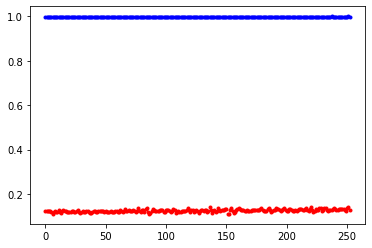

In [21]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()